# <span style="color:red"> <strong> MNIST Digit Recognition Using SVMs </strong>

<strong>Dataset:</strong> MNIST(Modified National Institude of Standards and Technology) database is a large dataset of handwritten digits that is commonly used for training and testing in the field of machine learning. It contains 60,000 training images and 10,000 testing images. The images were normalized to fit into a 28 x 28 pixel bounding box and anti-aliased, which introduced grayscale levels.

<strong>Objective:</strong> develop a model using SVM to classify the handwritten digits from 0-9 based on the pixel values given as features. This is a multi-class classification problem (10 classes).

<strong>Pipeline:</strong>

* Data Understanding
* Data Preparation
* Build Models (Linear SVM & Nonlinear SVM)
* Hyperparameters Tuning

### Data Understanding

In [8]:
# %pip install tensorflow_datasets

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

2023-01-03 13:05:22.296951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [3]:
X_train[0] #28 x 28 pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
Y_train[0] #digit 5

5

2023-01-03 13:05:32.752160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 13:05:33.506558: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


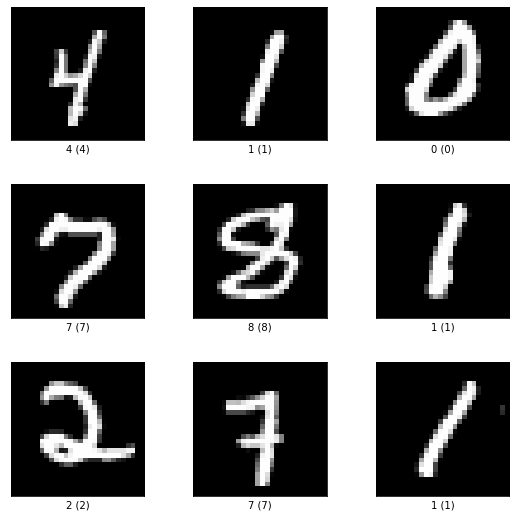

In [5]:
#visualize the dataset
ds_train, info = tfds.load("mnist", split="train", with_info=True)
fig = tfds.show_examples(ds_train, info)

In [6]:
#number of digit classes
from collections import Counter
print(Counter(Y_train))

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


### Data Preparation

In [7]:
#flatten the images from 28 x 28 to (num_of_samples, 784)
print("Before reshaping:", X_train.shape)
X_train = X_train.reshape(60000, 784)
print("Before reshaping:", X_train.shape)

Before reshaping: (60000, 28, 28)
Before reshaping: (60000, 784)


In [8]:
#reshape the test set
print("Before reshaping:", X_test.shape)
X_test = X_test.reshape(10000, 784)
print("Before reshaping:", X_test.shape)

Before reshaping: (10000, 28, 28)
Before reshaping: (10000, 784)


### Build Models

#### Linear SVM

In [9]:
from sklearn.svm import LinearSVC

#fit the model
linear_SVM = LinearSVC(
    penalty="l2",
    multi_class="ovr", #trains n-classes one-vs-rest classfiers
    max_iter=1000
)

linear_SVM.fit(X_train, Y_train)

/Users/opal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [10]:
#predict
Y_test_pred = linear_SVM.predict(X_test)
Y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
#evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=Y_test_pred), "\n")

accuracy: 0.8724 



In [12]:
#confusion matrix
print(metrics.confusion_matrix(y_true=Y_test, y_pred=Y_test_pred))

[[ 938    0    4    5    4    5   10    5    9    0]
 [   0 1110    5    1    1    2    4    1    9    2]
 [   5    9  941   12   22    3    5    7   27    1]
 [   9    4   38  841    7   54    3    9   33   12]
 [   0    2   10    1  929    1    4    2   19   14]
 [   7    5    6   28   31  699   17   12   80    7]
 [  10    3   20    0    9   23  883    1    9    0]
 [   0   10   31    7    9    1    1  927    7   35]
 [  11   17   27   16   12   73   17    7  786    8]
 [   7   11    7   10  145    8    0   42  109  670]]


The linear SVM gives 87% accuracy. Let's look at a nonlinear SVM model now!

#### Nonlinear SVM

In [13]:
from sklearn.svm import NuSVC

#fit the nonlinear SVM model with RBF kernel
nonlinear_SVM = NuSVC(
    kernel="rbf"
)

nonlinear_SVM.fit(X_train, Y_train)

NuSVC()

In [14]:
#predict
Y_test_pred_2 = nonlinear_SVM.predict(X_test)
Y_test_pred_2

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
#evaluation
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=Y_test_pred_2), "\n")

accuracy: 0.9213 



In [16]:
#confusion matrix
print(metrics.confusion_matrix(y_true=Y_test, y_pred=Y_test_pred_2))

[[ 948    0    1    2    0   13   11    1    4    0]
 [   0 1111    4    3    0    2    4    0   11    0]
 [  12   11  914   11   20    4   12   17   28    3]
 [   4    8   20  922    0   16    4   13   17    6]
 [   1    9    3    0  920    0   12    1    2   34]
 [   5    8    6   23    8  815   13    2    7    5]
 [  13    7    5    0    9   16  906    0    2    0]
 [   2   36   26    0   13    0    0  909    9   33]
 [   7    9   11   22   12   22   12    6  856   17]
 [  14   11    5    9   30    8    1   12    7  912]]


In [17]:
nonlinear_SVM.get_params()

{'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.5,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The RBF kernel SVM gives 92% accuracy.

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits=5, shuffle=True, random_state=1)
hyperparameters = [
    {"gamma": [1e-2, 1e-3, 1e-4],
    "C": [5, 10]}
]

model = NuSVC(kernel="rbf")
CV = GridSearchCV(
    estimator=model, 
    param_grid=hyperparameters,
    scoring="accuracy",
    cv=folds,
    verbose=1,
    return_train_score=True
)

CV.fit(X_train, Y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = CV.best_score_
best_hyperparams = CV.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))